# Time Series Analysis, based on Datacamp Courses

## White Noise

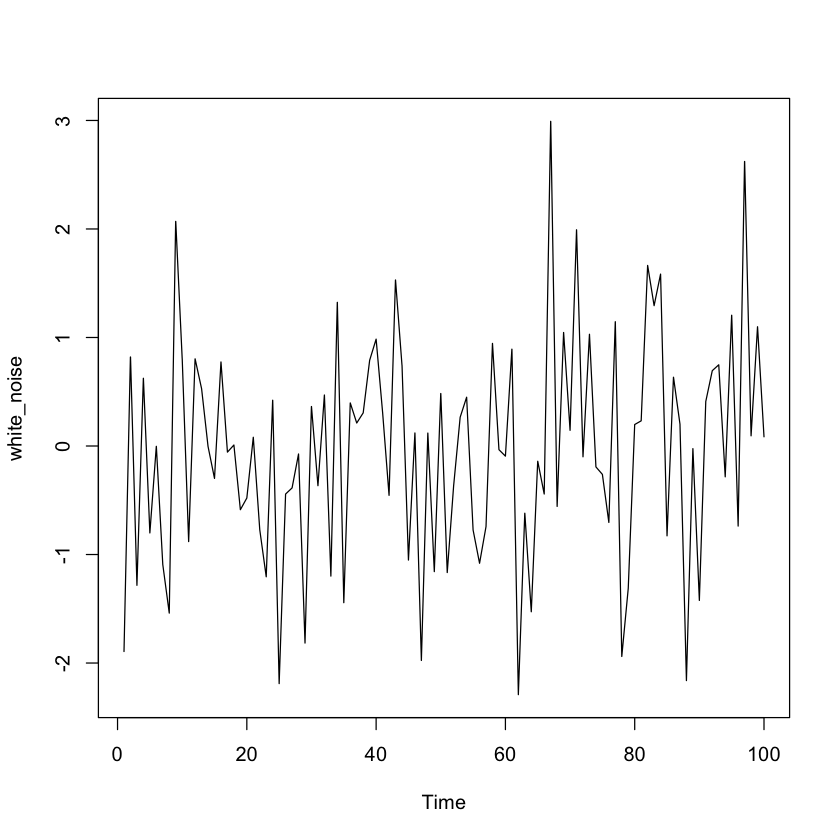

In [1]:
white_noise <- arima.sim(model = list(order=c(0,0,0)), n = 100)
ts.plot(white_noise)

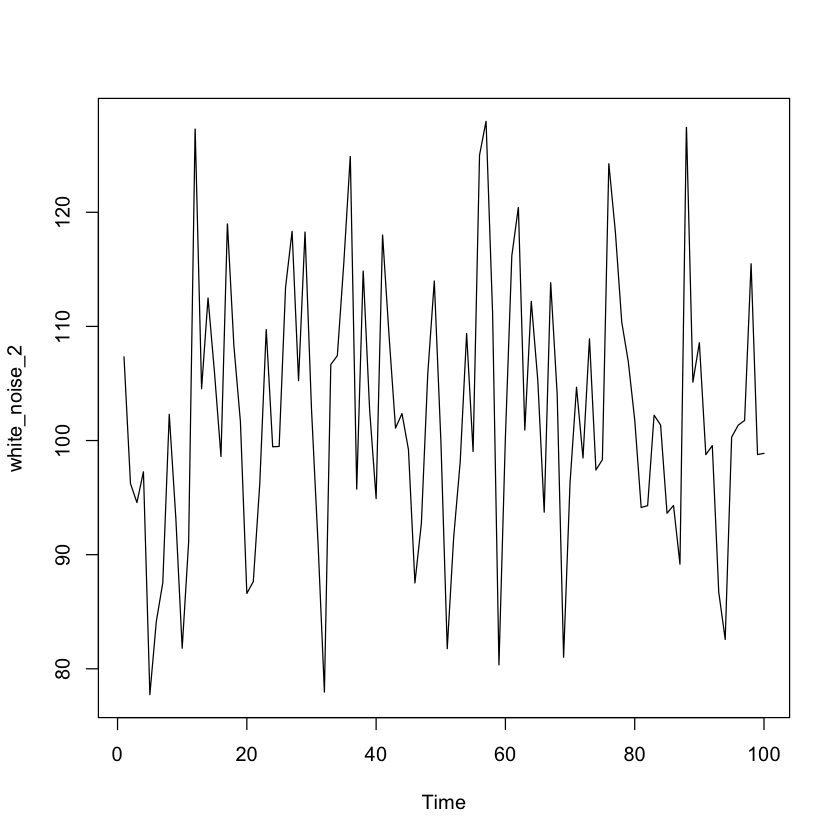

In [2]:
white_noise_2 <- arima.sim(model = list(order=c(0,0,0)), n = 100, mean = 100, sd = 10)
ts.plot(white_noise_2)

In [3]:
arima(white_noise_2,order=c(0,0,0))
mean(white_noise_2)
var(white_noise_2)


Call:
arima(x = white_noise_2, order = c(0, 0, 0))

Coefficients:
      intercept
       102.2320
s.e.     1.1525

sigma^2 estimated as 132.8:  log likelihood = -386.35,  aic = 776.7

[1] 102.232

[1] 134.1745

## Random Walk

Y<sub>t</sub> = c + Y<sub>t-1</sub> + &epsilon;

&epsilon; &isin; WhiteNoise(m = c)

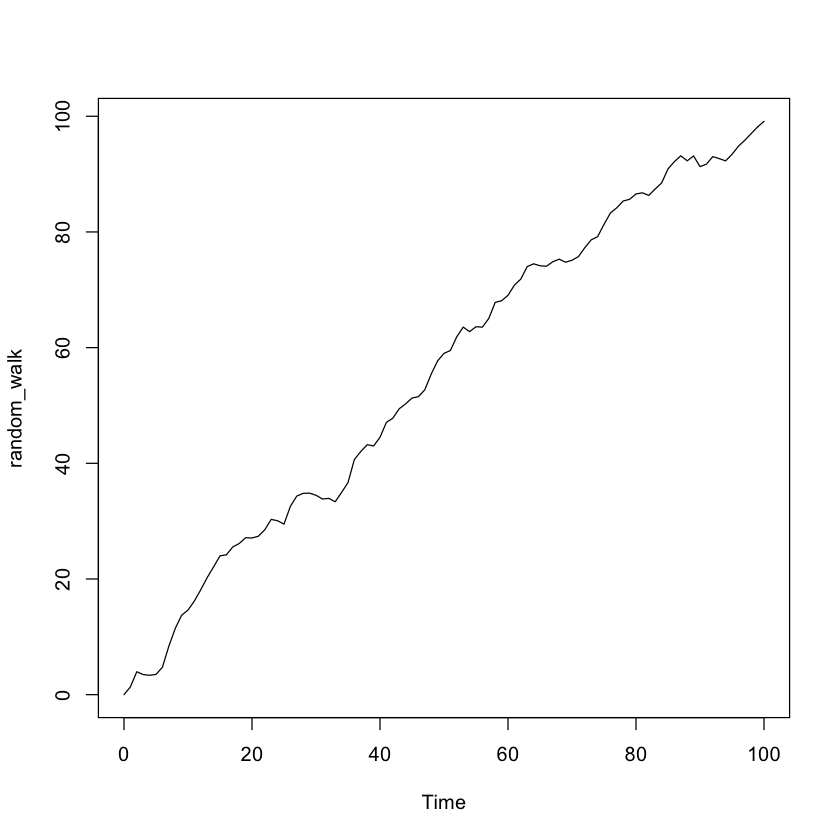

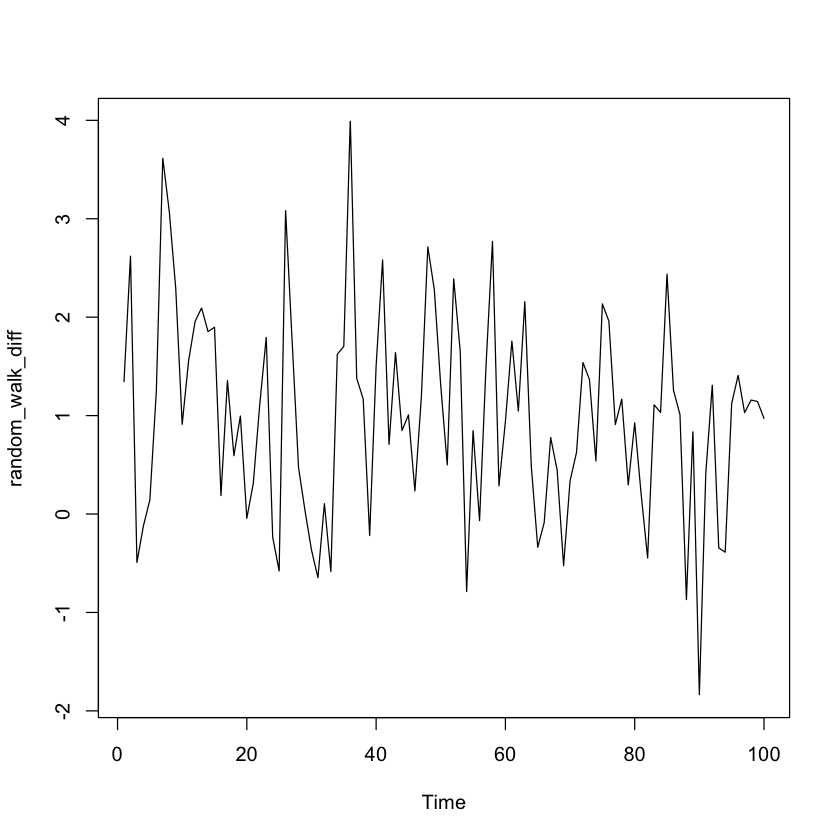

In [4]:
random_walk <- arima.sim(model = list(order=c(0,1,0)), n = 100, mean =1)
ts.plot(random_walk)
random_walk_diff <- diff(random_walk)
ts.plot(random_walk_diff)
  

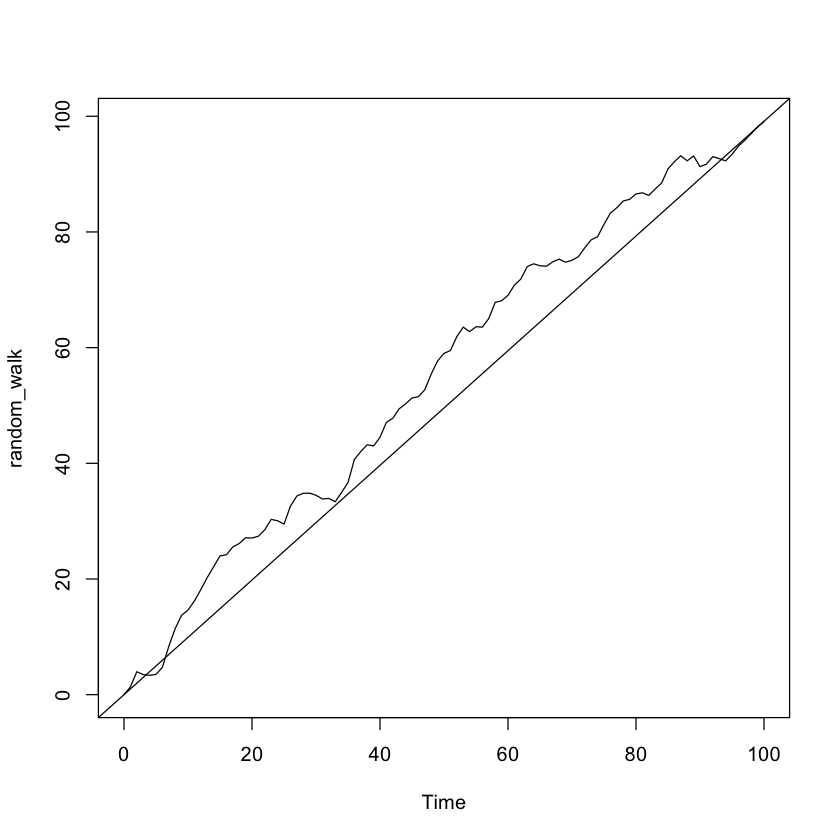

In [5]:
model_wn <- arima(random_walk_diff, order= c(0,0,0))
# Store the value of the estimated time trend (intercept)
int_wn <- model_wn$coef
ts.plot(random_walk)
abline(0,int_wn)

## Stationary Process

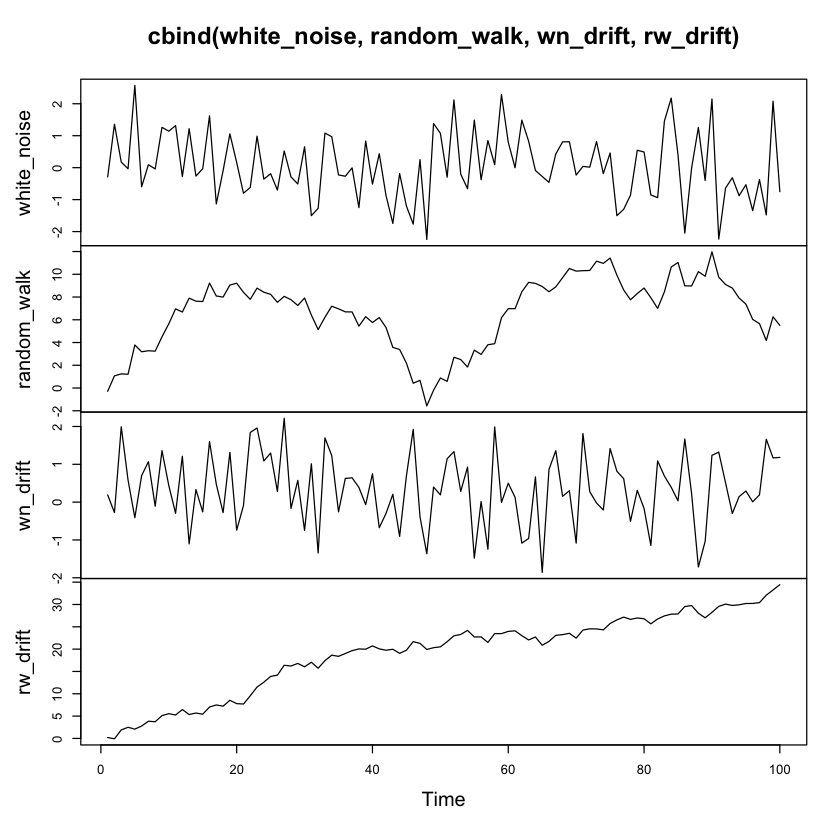

In [6]:
white_noise <- arima.sim(model=list(order=c(0,0,0)),n=100)
random_walk <- cumsum(white_noise)
wn_drift <- arima.sim(model=list(order=c(0,0,0)),n=100,mean=.4)
rw_drift <- cumsum(wn_drift)
plot.ts(cbind(white_noise, random_walk, wn_drift, rw_drift))

---

## Autocorrelation  ACF


Autocorrelations of series ‘white_noise_2’, by lag

     0      1      2      3      4      5 
 1.000  0.295 -0.033 -0.065 -0.085 -0.061 

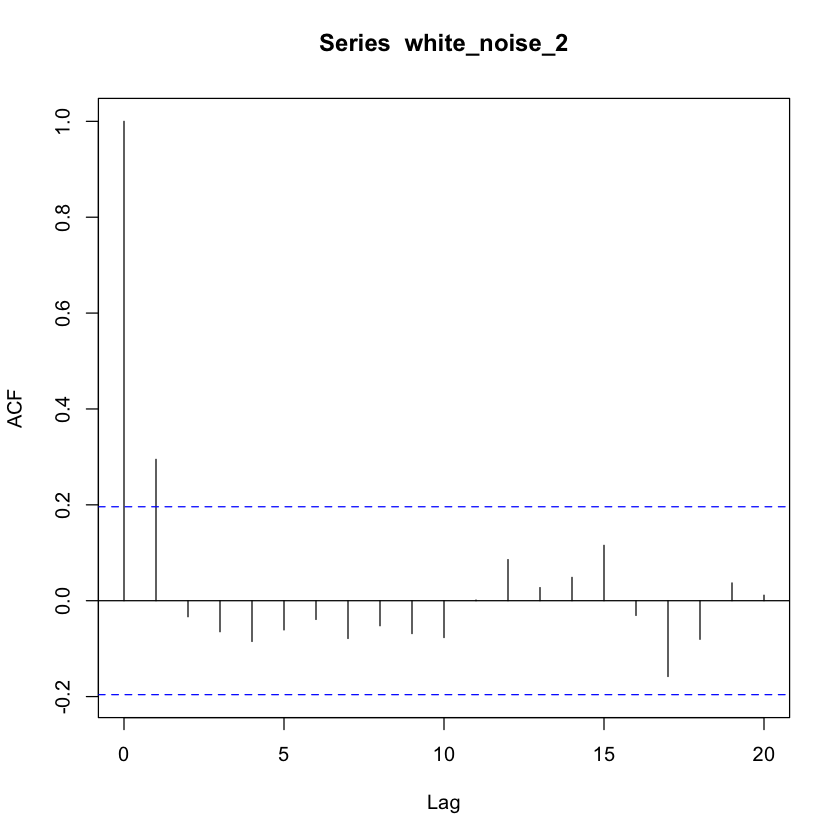

In [7]:
acf(white_noise_2,lag.max = 5,plot = FALSE)
acf(white_noise_2)

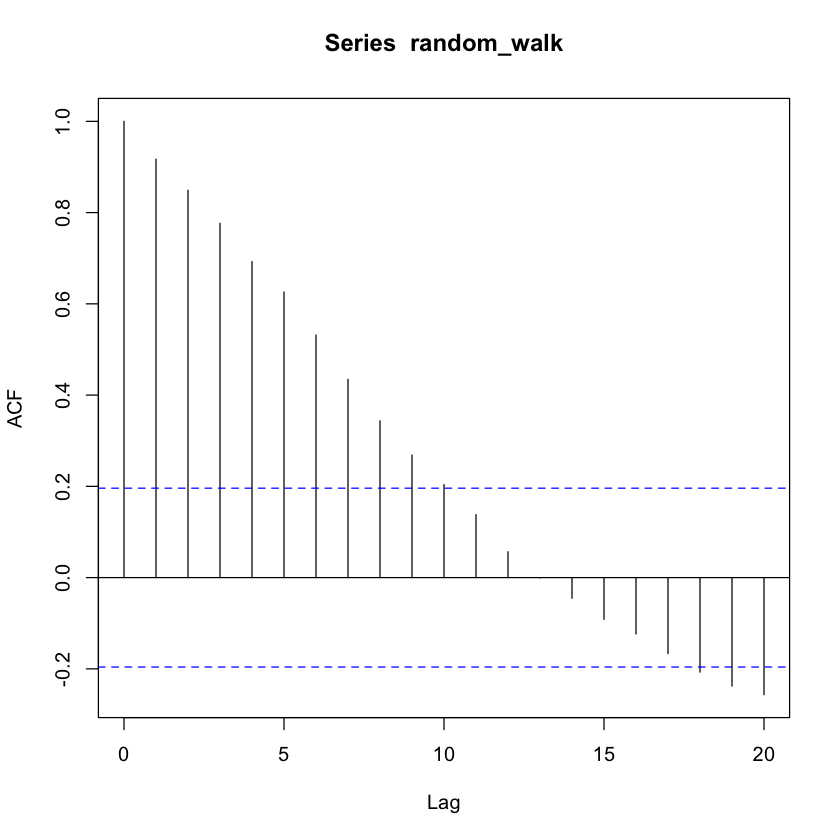

In [8]:
acf(random_walk)

In [9]:
library(quantmod)
getSymbols('AAPL')
x <- as.ts(AAPL$AAPL.Close)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "AAPL"

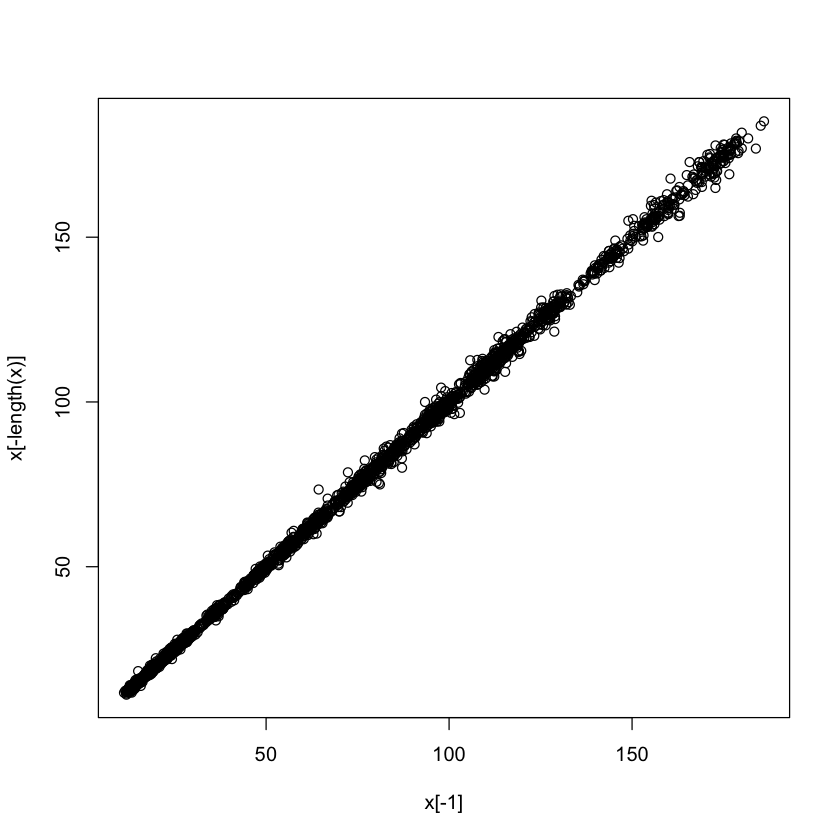

In [10]:
plot(x[-1],x[-length(x)])

---
## Autoregressive ~AR

### Y<sub>t</sub> - &mu; = &phi; ( Y<sub>t-1</sub> - &mu; ) + &epsilon;<sub>t</sub> :  

+ if &phi; == 0 -> WhiteNoise 

+ if &phi; == 1 & &mu; == 0 -> RandomWalk

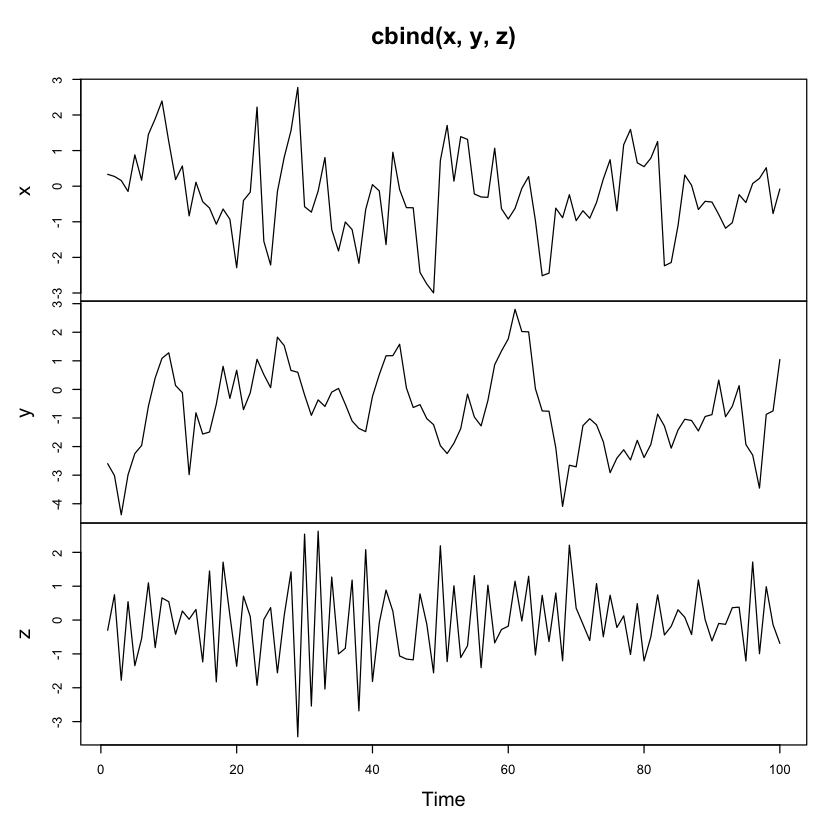

In [11]:
x <- arima.sim(model = list(ar=.5), n = 100)
y <- arima.sim(model = list(ar=.9), n = 100)
z <- arima.sim(model = list(ar= -.75), n = 100)
plot.ts(cbind(x,y,z))

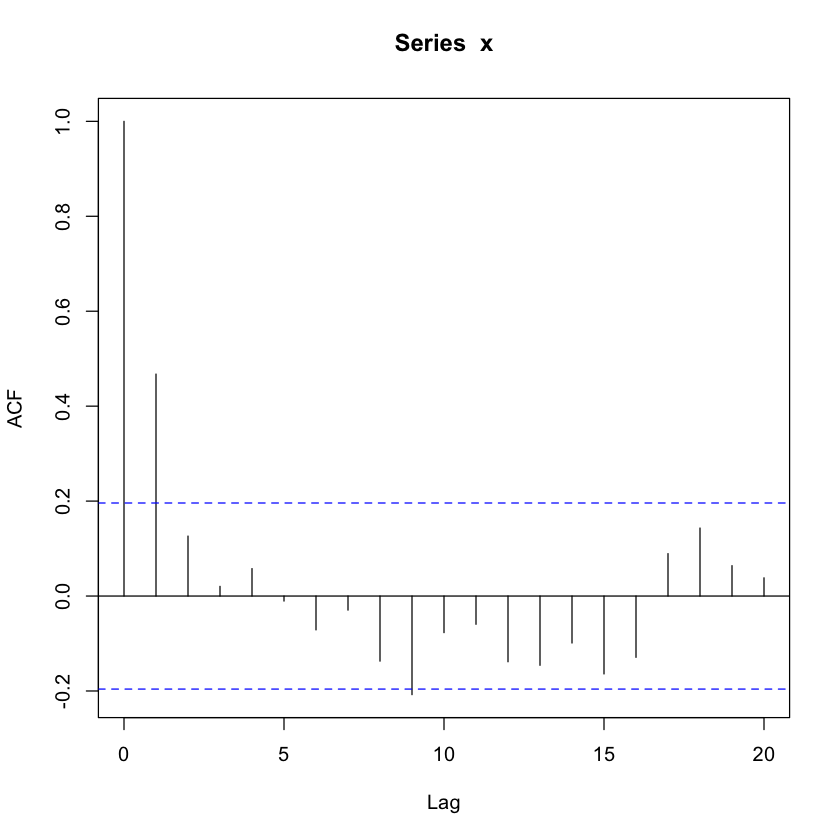

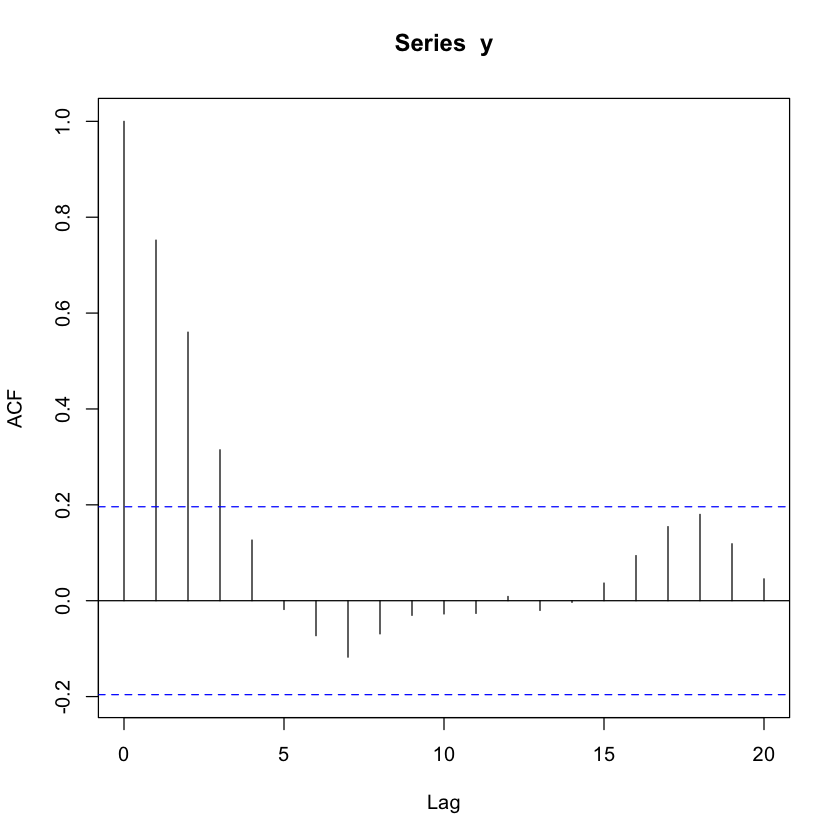

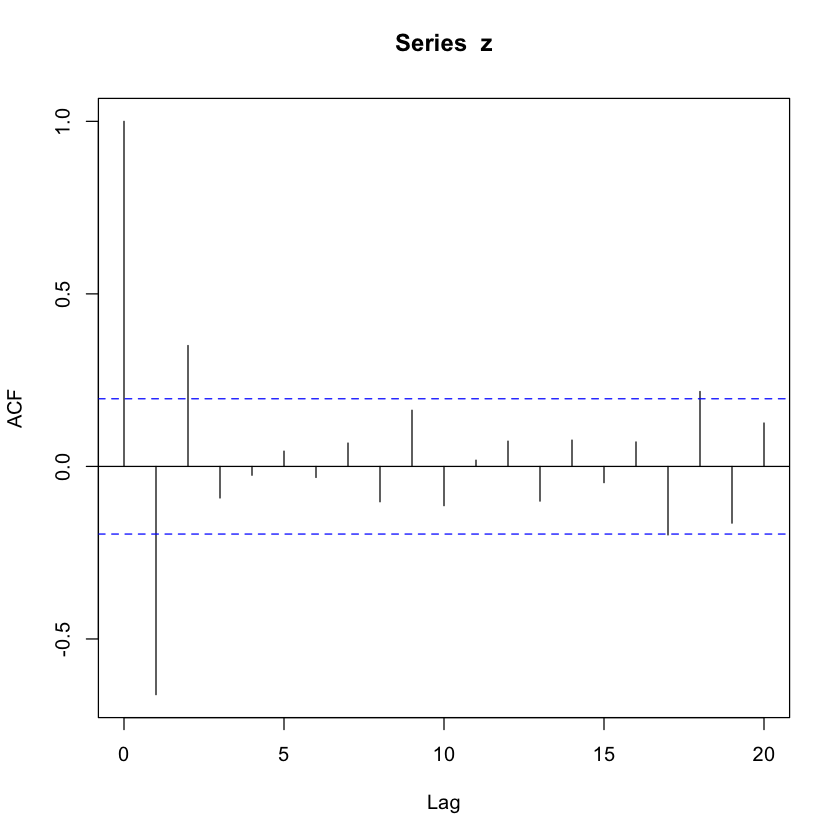

In [12]:
acf(x)
acf(y)
acf(z)

---
## AR estimate and predict

In [17]:
data(Mishkin,package = 'Ecdat')
x <- as.ts(Mishkin[,1])

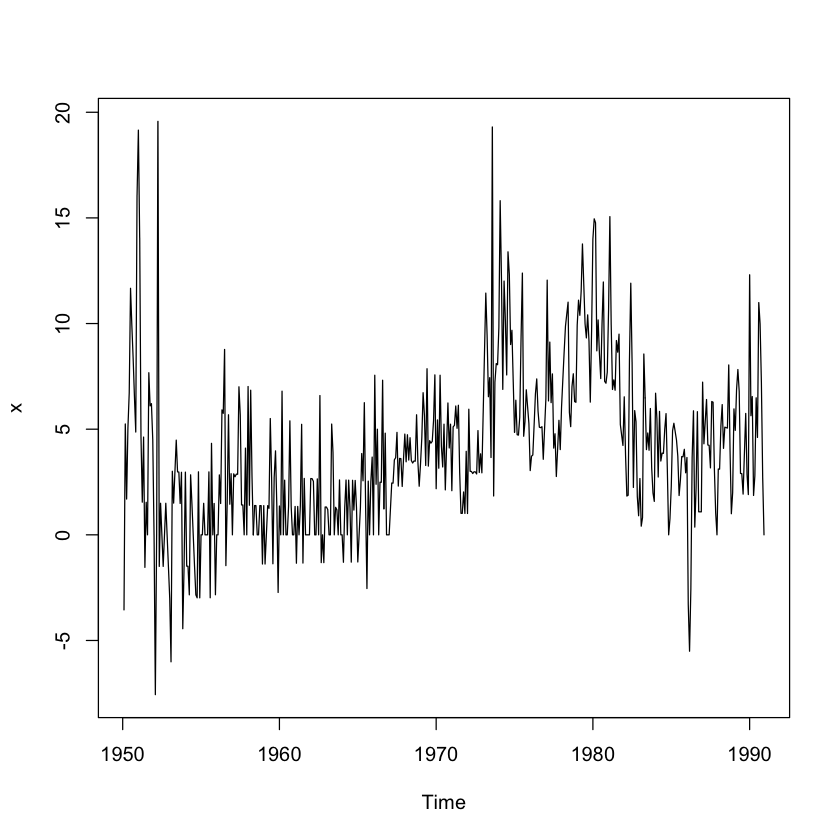

In [21]:
ts.plot(x)

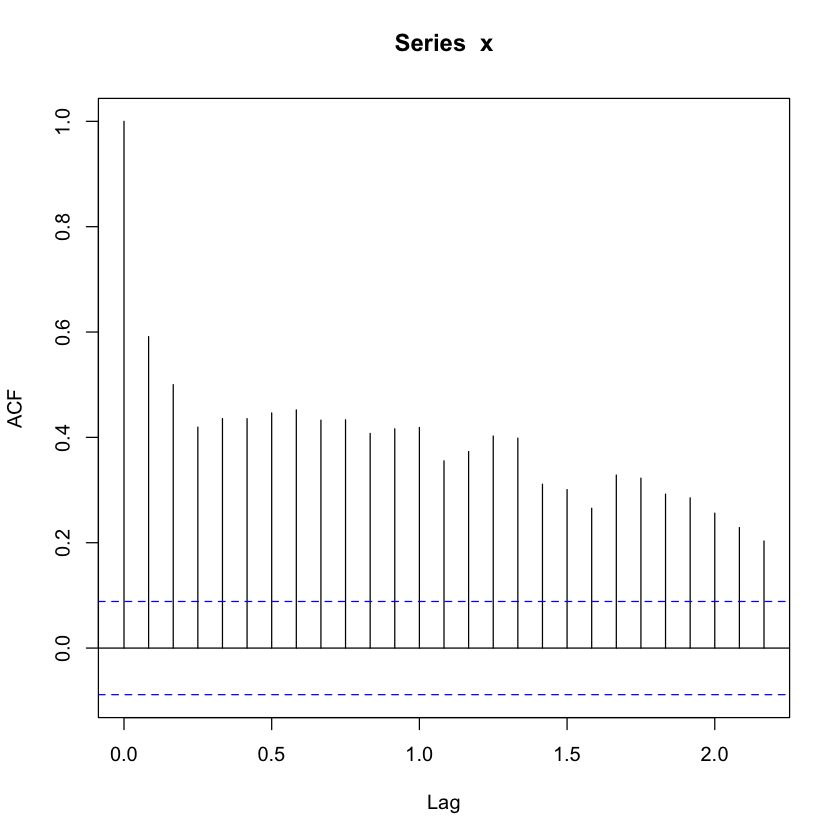

In [22]:
acf(x)

In [23]:
arima(x, order = c(1,0,0))


Call:
arima(x = x, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5960     3.9745
s.e.  0.0364     0.3471

sigma^2 estimated as 9.713:  log likelihood = -1255.05,  aic = 2516.09

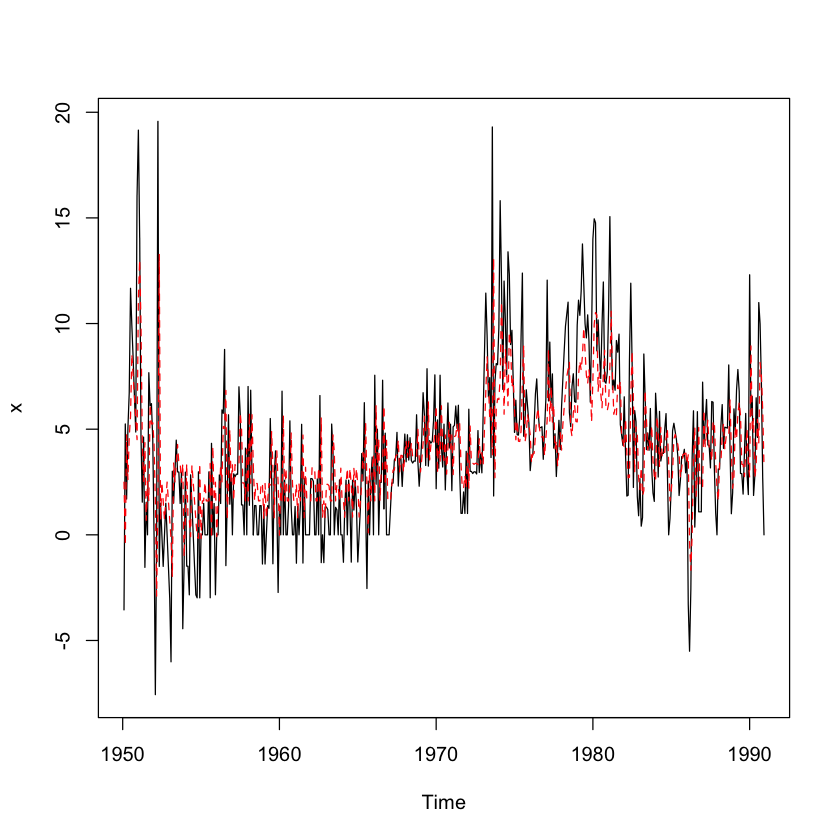

In [27]:
ts.plot(x)
points(x - residuals(arima(x, order = c(1,0,0))),col = 2,lty=2,type='l')
# it shows that AR model can partly explain the original x shape

[1] 1.605797

$pred
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1991 1.605797 2.562810 3.133165 3.473082 3.675664 3.796398 3.868352 3.911234
          Sep      Oct
1991 3.936792 3.952023

$se
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1991 3.116526 3.628023 3.793136 3.850077 3.870101 3.877188 3.879702 3.880594
          Sep      Oct
1991 3.880911 3.881024


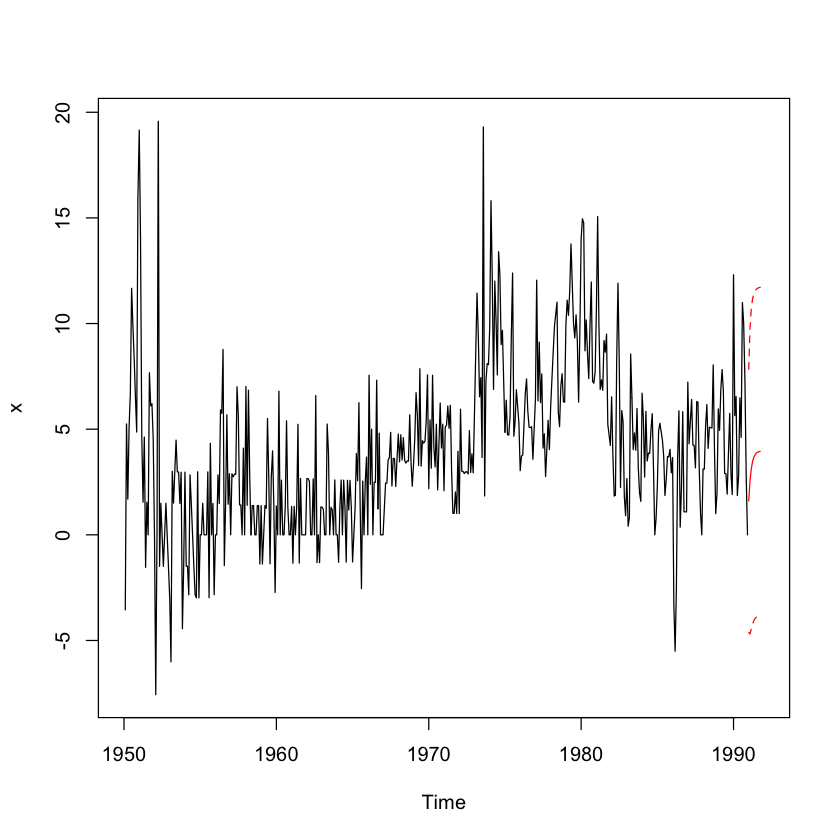

In [35]:
# predict
AR_fit <-arima(x, order  = c(1,0,0))
# Obtain the 1-step forecast using $pred[1]
predict_AR <- predict(AR_fit)
predict_AR$pred[1]

# Use predict to make 1-step through 10-step forecasts
predict(AR_fit, n.ahead = 10)
# Run to plot the Nile series plus the forecast and 95% prediction intervals
ts.plot(x,xlim=c(1950,1992))
AR_forecast <- predict(AR_fit, n.ahead = 10)$pred
AR_forecast_se <- predict(AR_fit, n.ahead = 10)$se
points(AR_forecast, type = "l", col = 2)
points(AR_forecast - 2*AR_forecast_se, type = "l", col = 2, lty = 2)
points(AR_forecast + 2*AR_forecast_se, type = "l", col = 2, lty = 2)

---
## Simple Moving Average Model
### Y<sub>t</sub> = &mu; + &epsilon;<sub>t</sub> + &theta;<sub>t-1</sub>